TotRmag Normal Fit -21.391494750976562, 1.056513786315918
TotRmag Gamma fit : 34.07612063236854 -27.479528481494917 0.17862630918533617


No handles with labels found to put in legend.
No handles with labels found to put in legend.


TotRmag Johnson fit : -0.5241155807601983 1.659188484469038 -21.91827788537714 1.3657450090828793
TotRmag BoxCox lamda 4.25768875262945
TotRmag Normal fit : 110069.0078125 21927.10546875


No handles with labels found to put in legend.


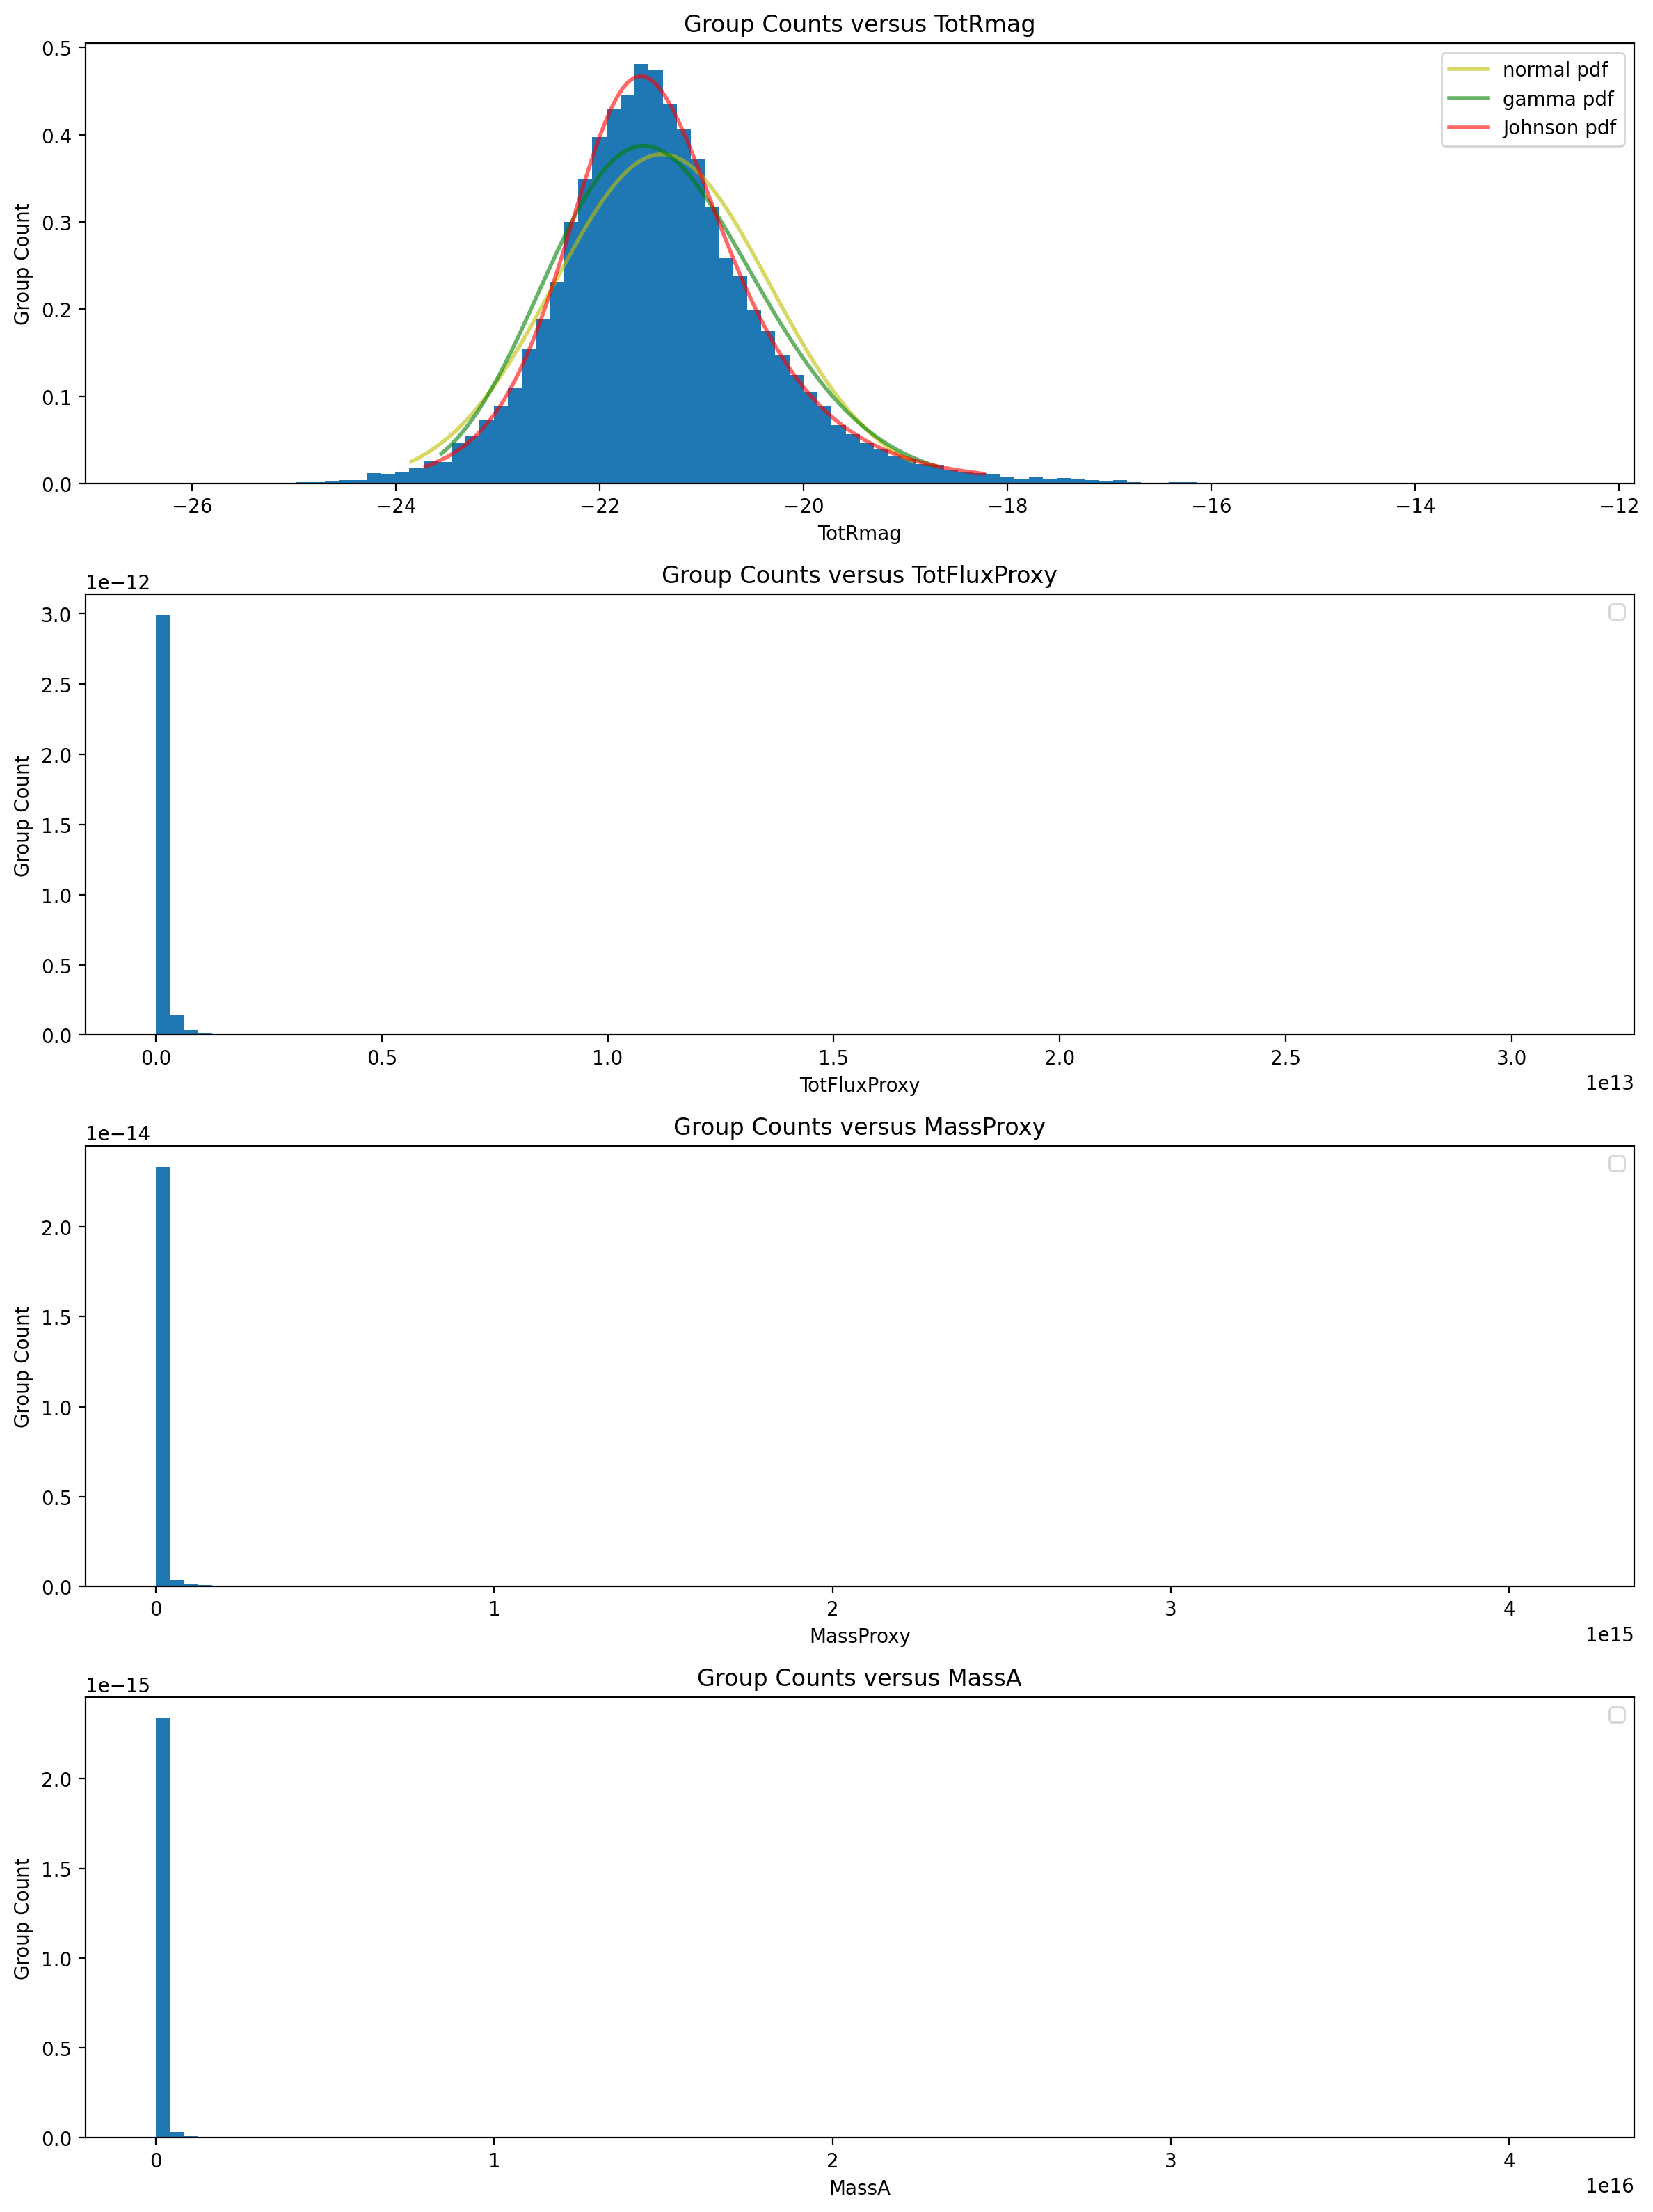

<Figure size 2400x3200 with 0 Axes>

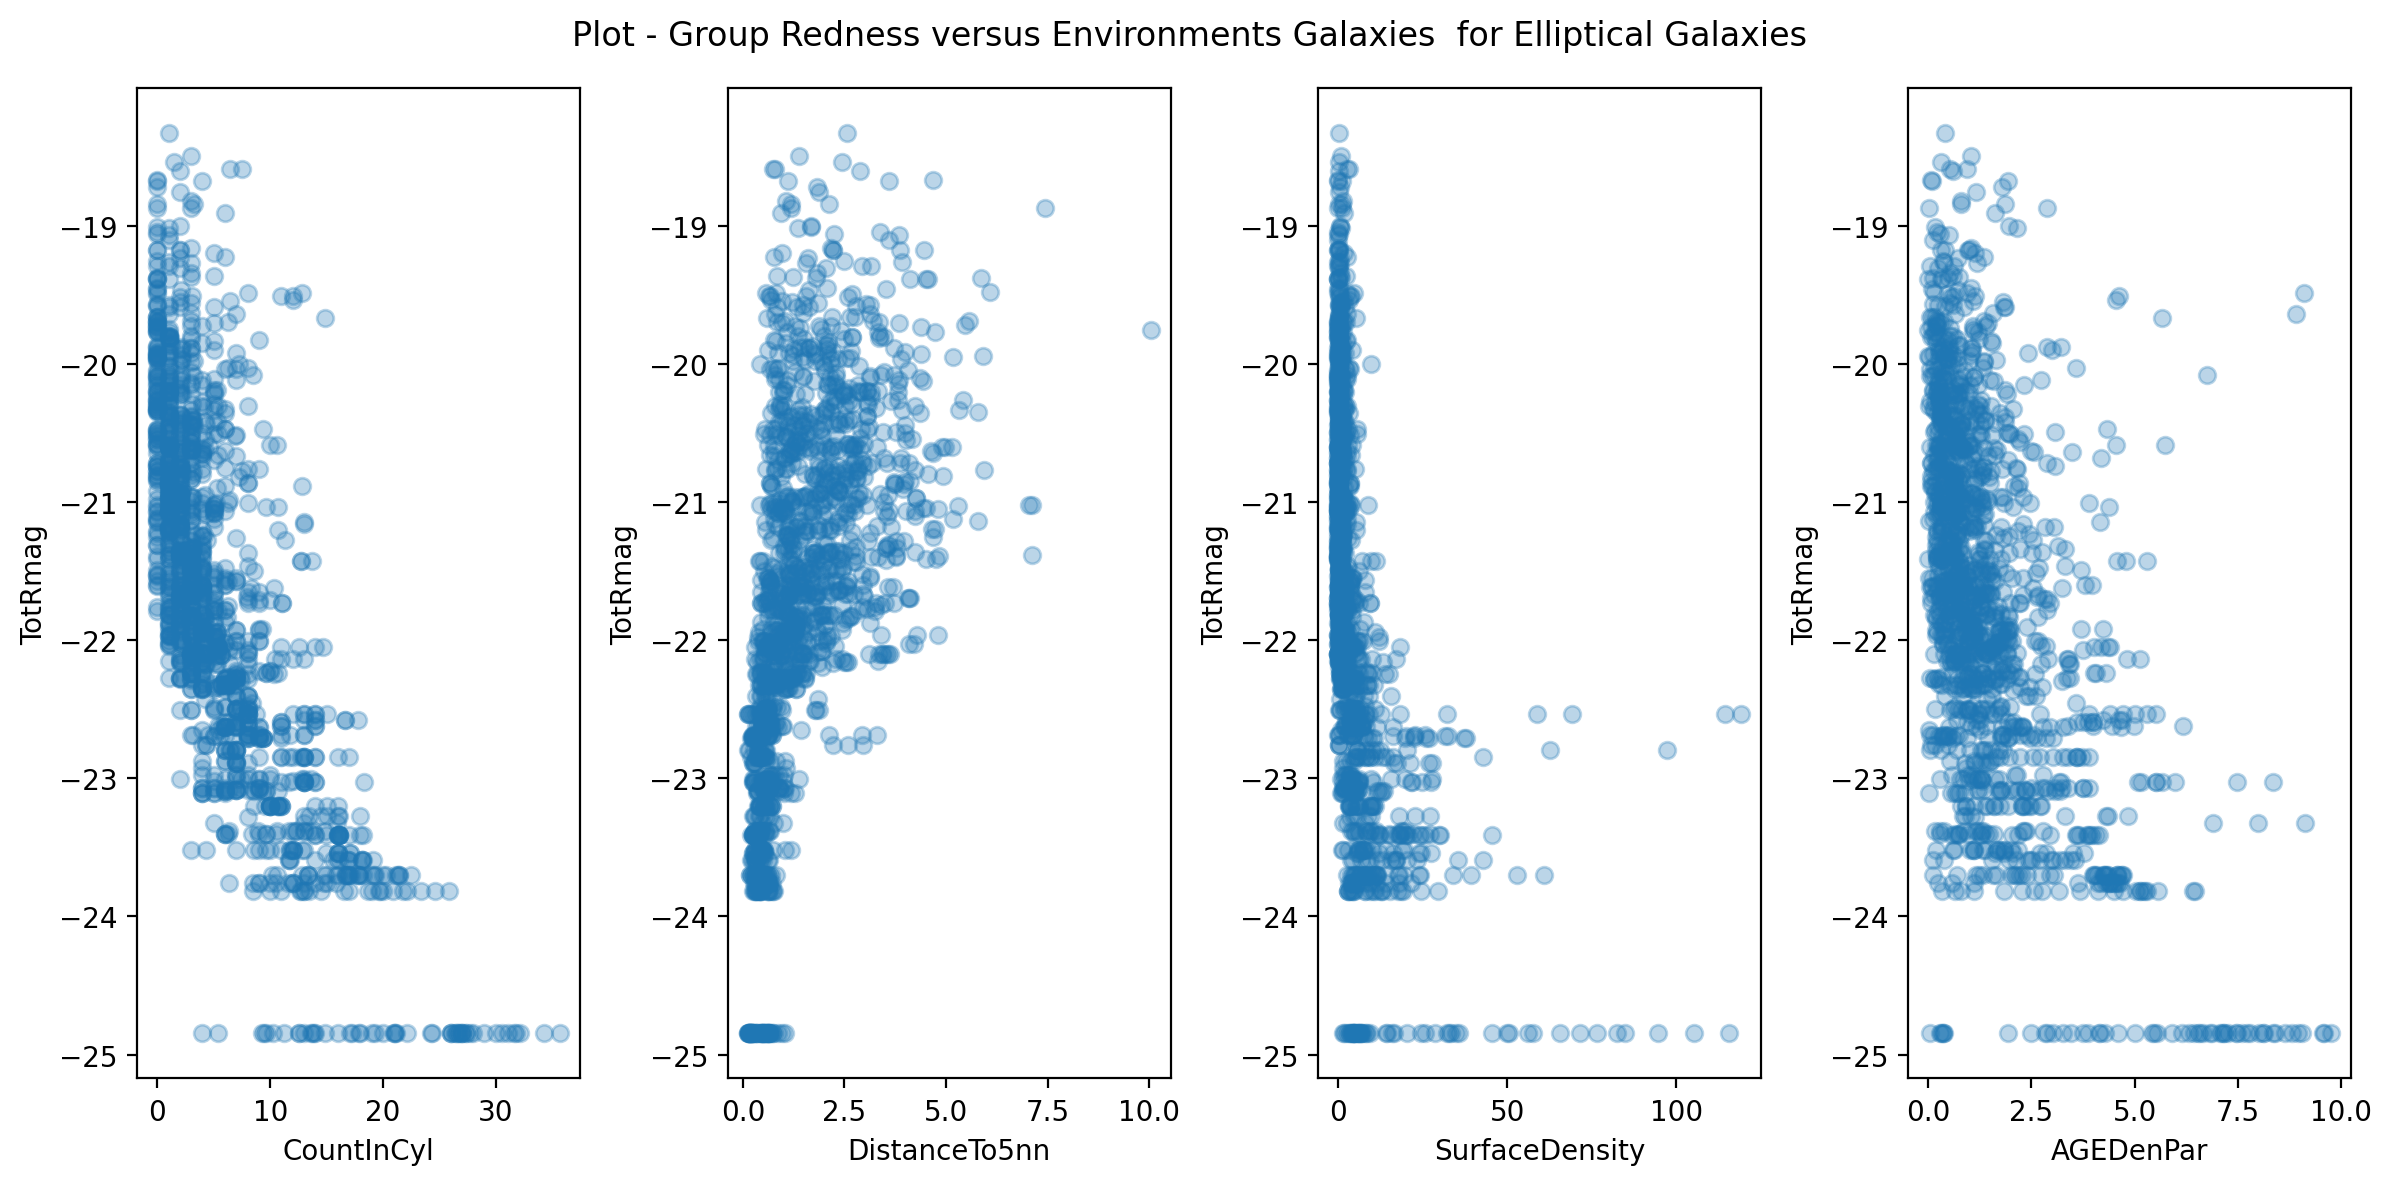

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_52479/2912824446.py:123: RuntimeWarning: divide by zero encountered in log
  x = np.log(RErange[xfield])


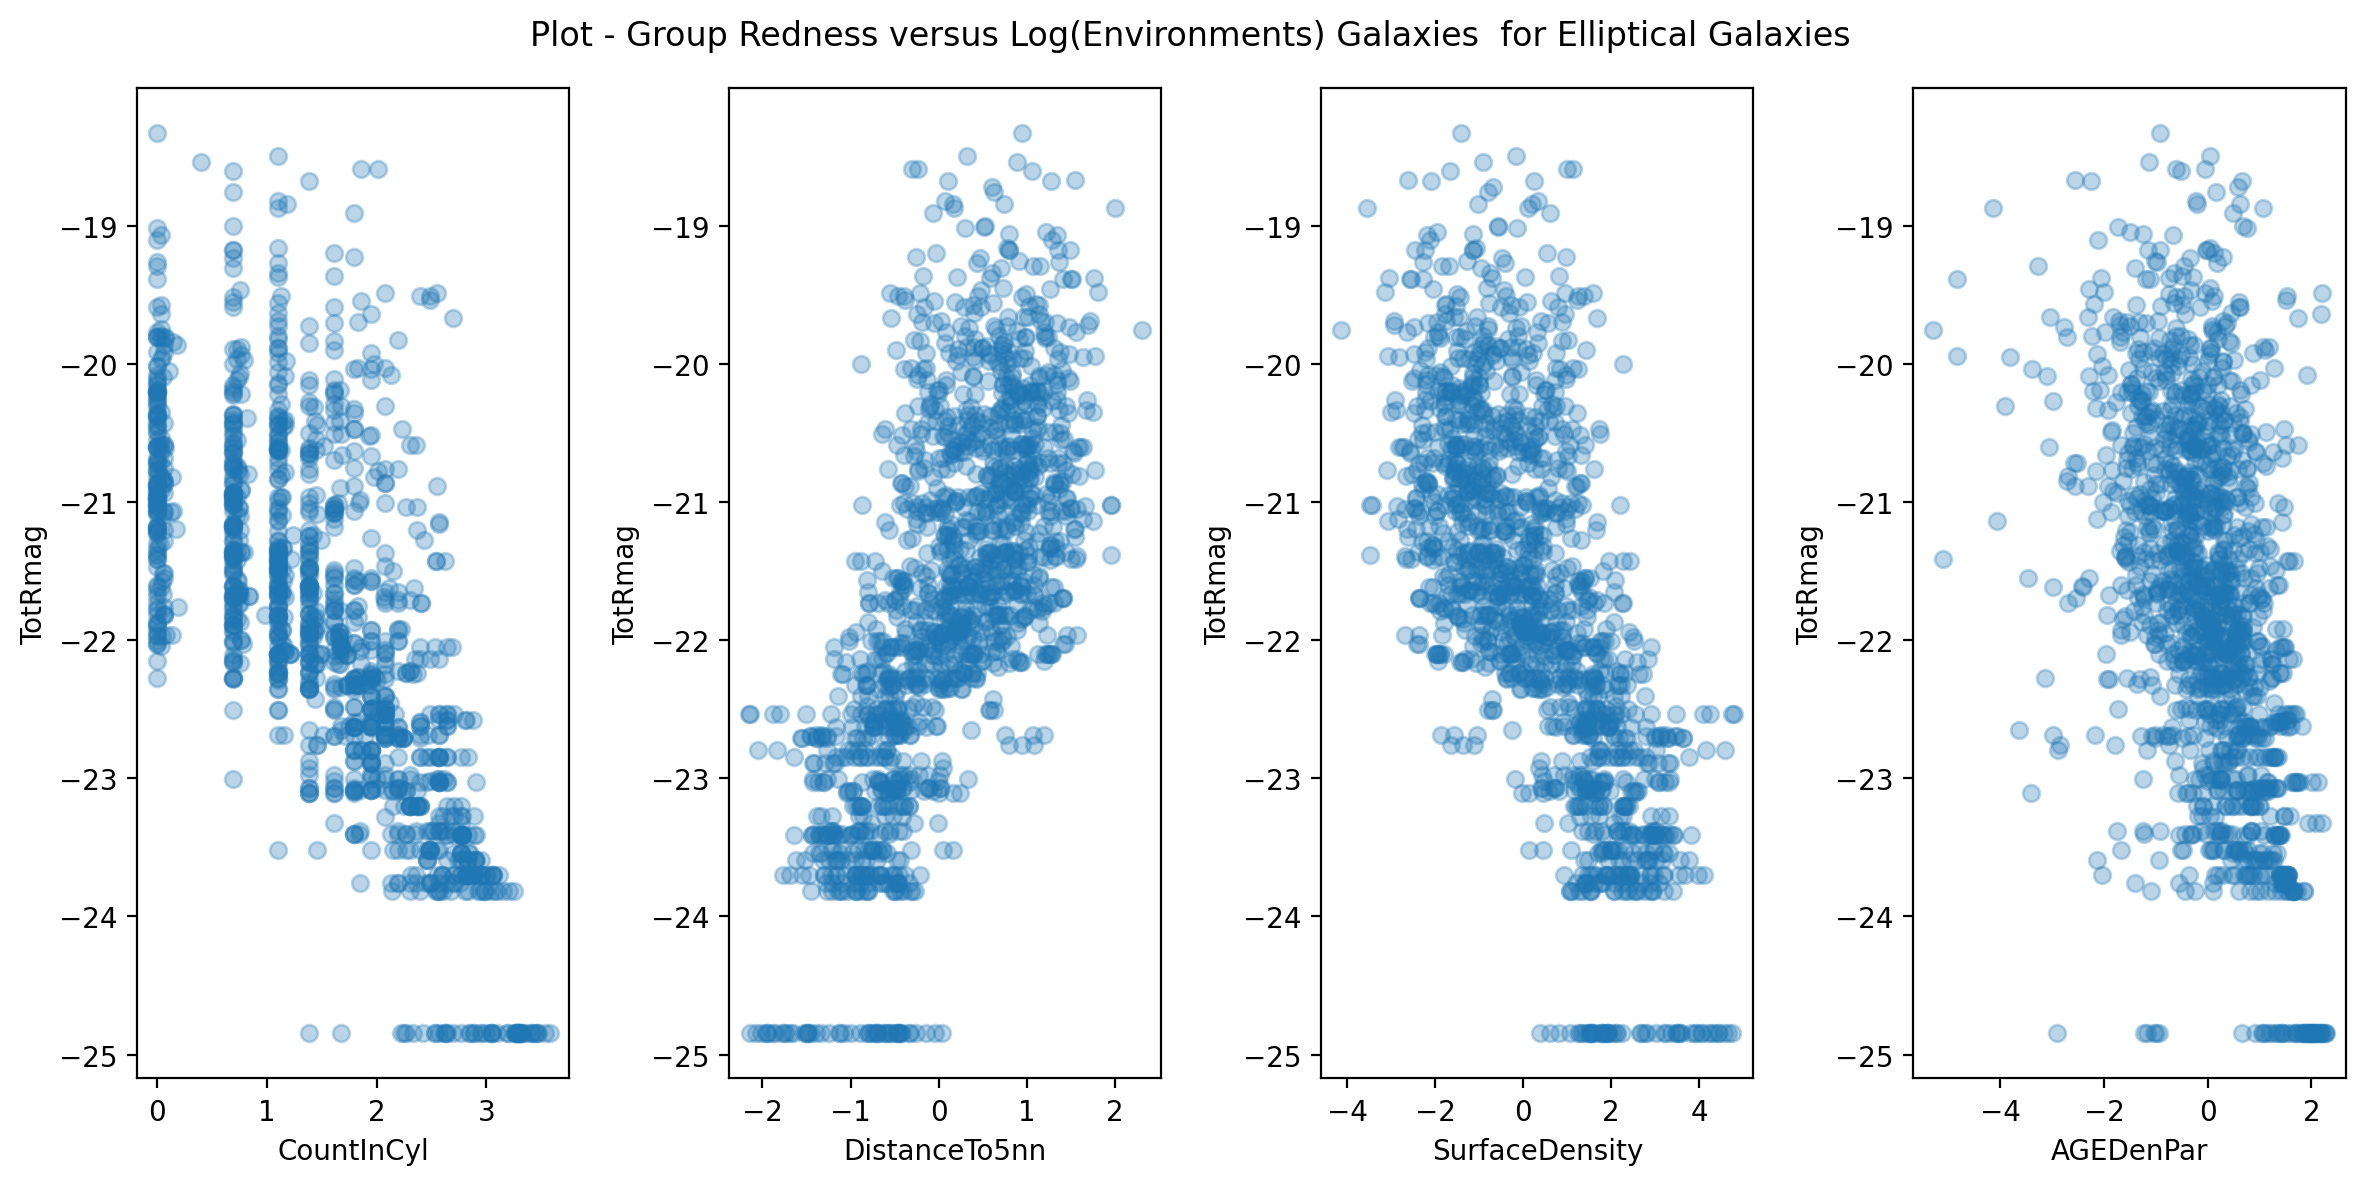

-24.846533
-18.32849


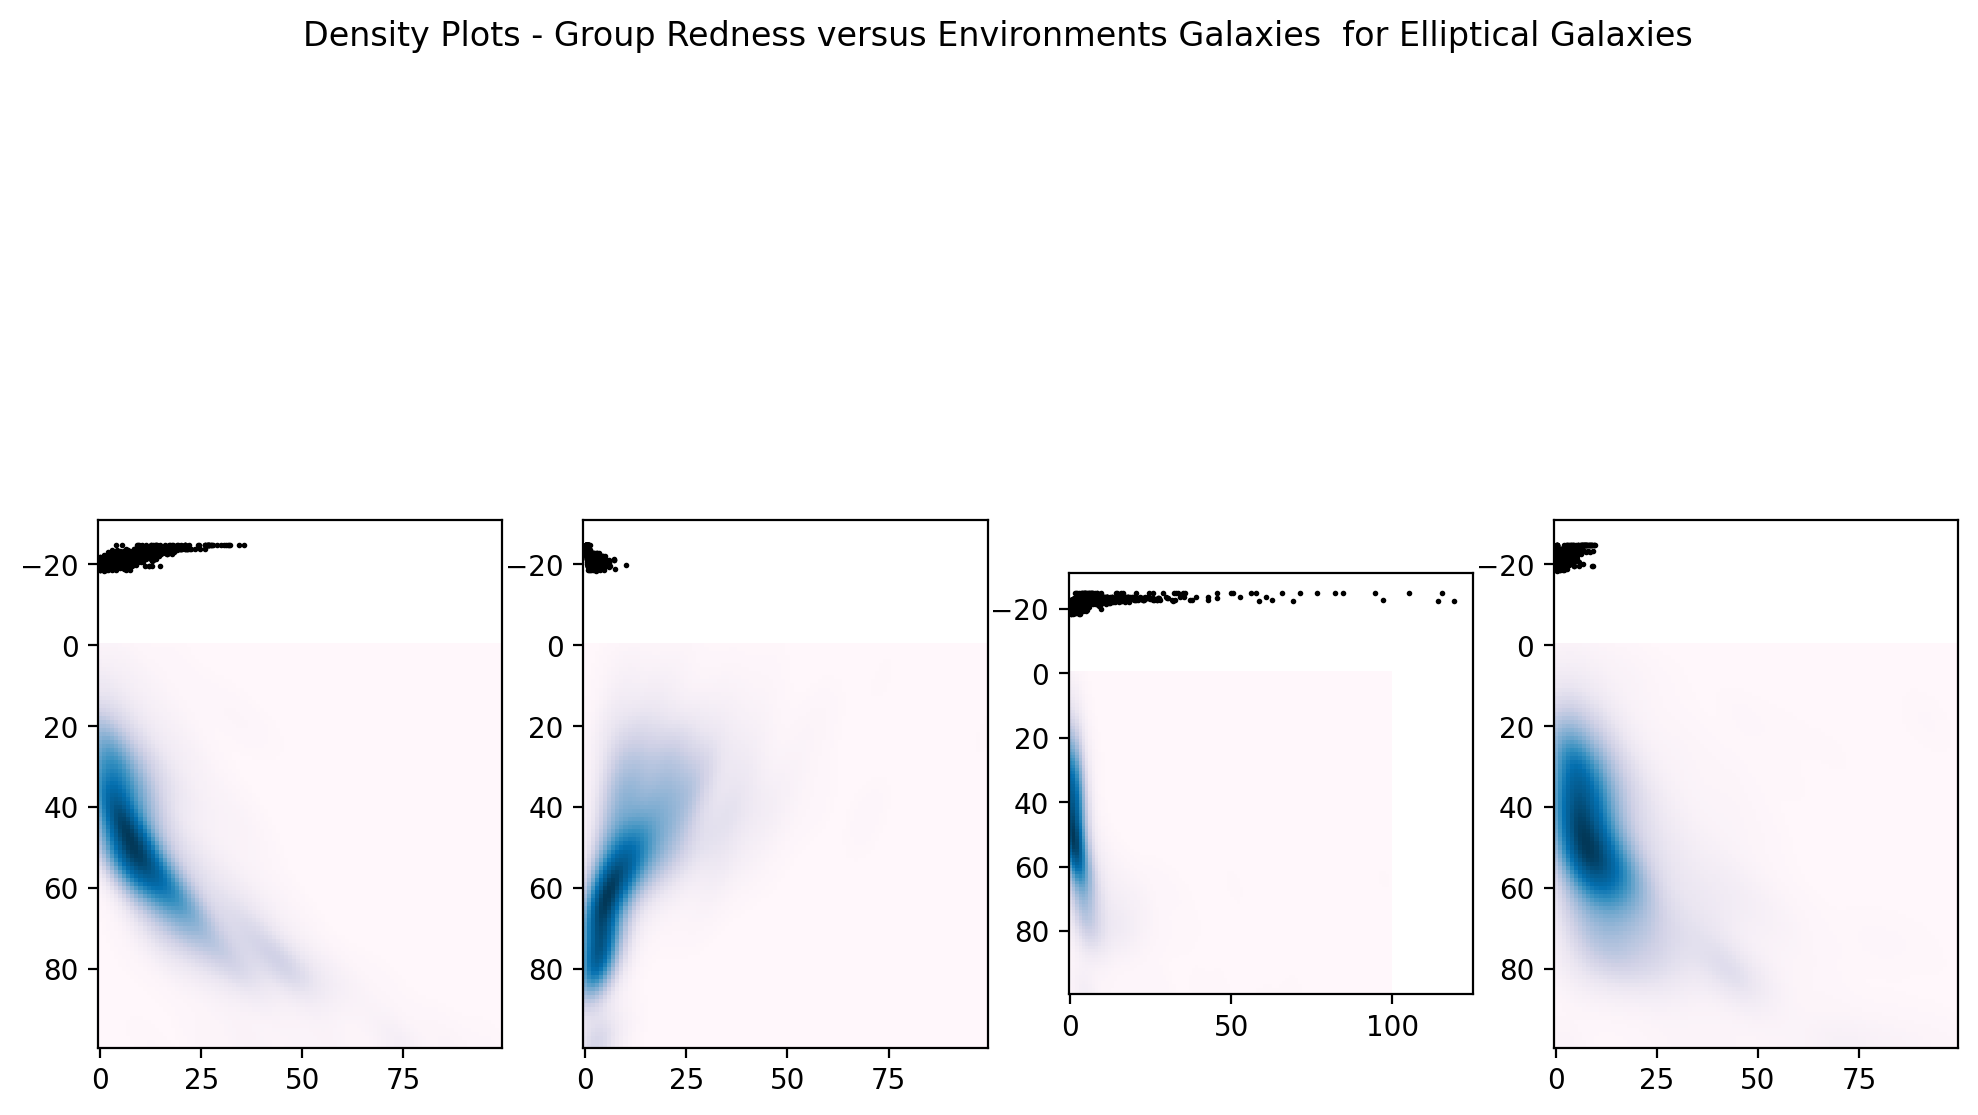

-24.846533
-18.32849


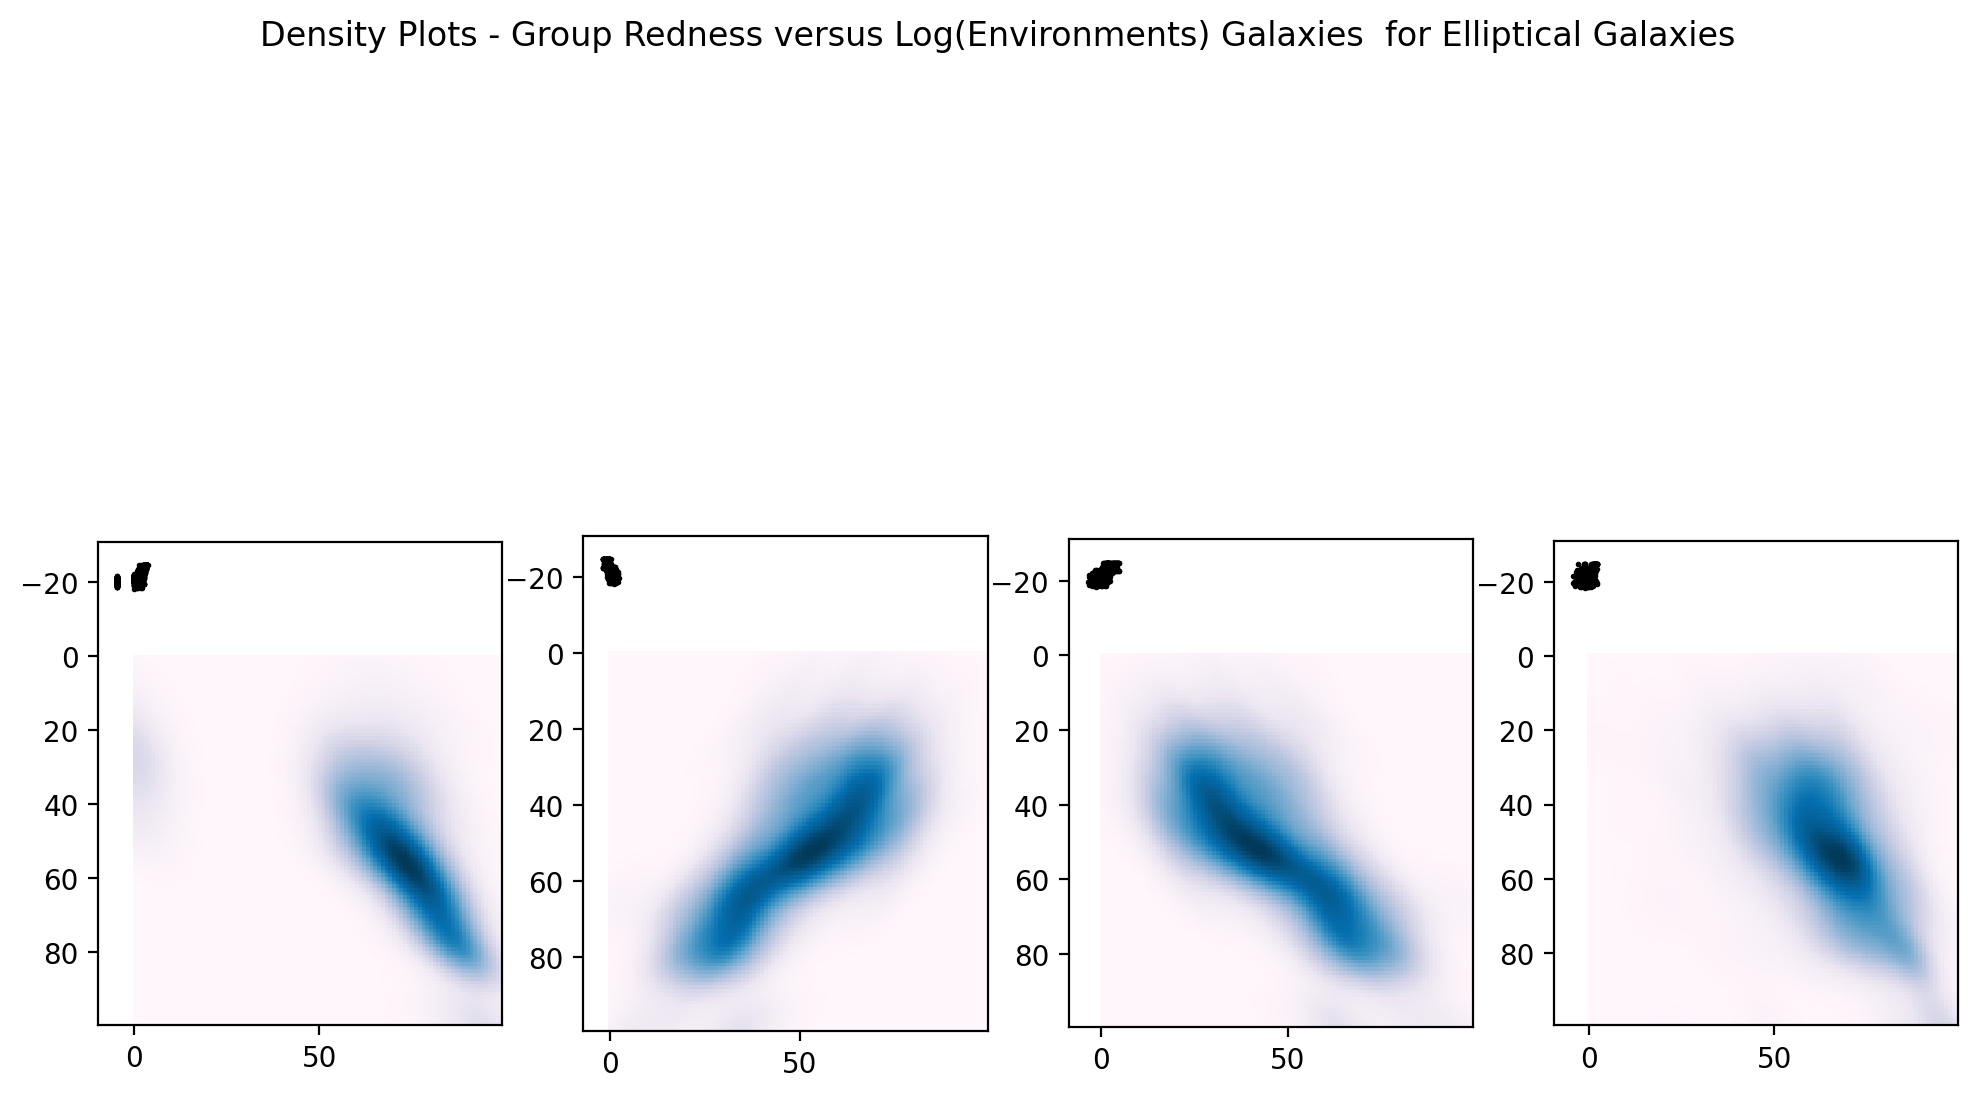

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

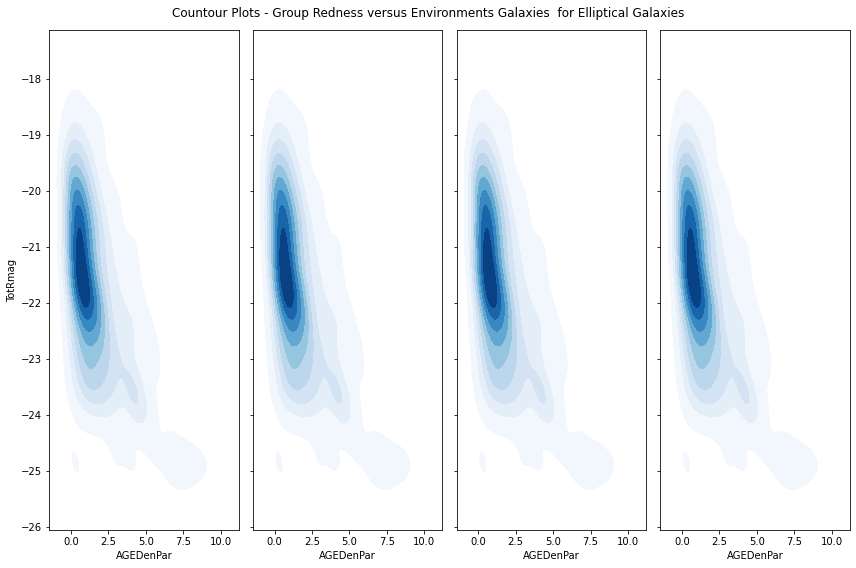

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

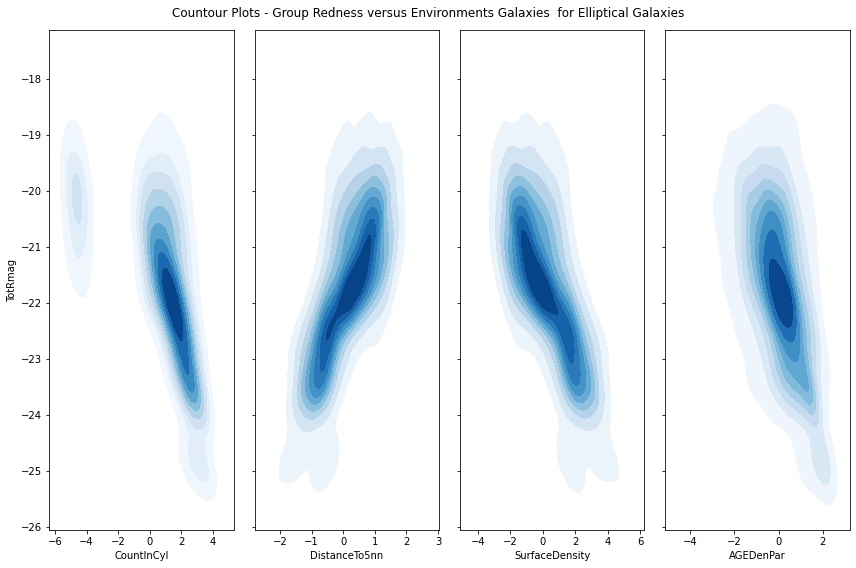

In [15]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
## Clean Data

binCount = 100

fig = plt.figure(figsize=(12, 16), dpi=200)

xfield = 'TotRmag'
ax1 = fig.add_subplot(4, 1, 1)
ax1.title.set_text('Group Counts versus '+xfield)
ax1.set_ylabel('Group Count')
ax1.set_xlabel(xfield)

an, bn =stats.norm.fit(ForGroup[xfield].data)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(ForGroup[xfield].data)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(ForGroup[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(-ForGroup[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
acn ,bcn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {acn} {bcn}")
xcn0, xcn1 = stats.norm.ppf([0.01, 0.99], acn, scale = bcn)
xcn = np.linspace(xcn0,xcn1,100)
# y values for CoxBox
ycn = (lamda / xcn**lamda-1)

ax1.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.legend()

xfield = 'TotFluxProxy'
ax2 = fig.add_subplot(4, 1, 2)
ax2.title.set_text('Group Counts versus '+xfield)
ax2.set_ylabel('Group Count')
ax2.set_xlabel(xfield)
ax2.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax2.legend()

xfield = 'MassProxy'
ax3 = fig.add_subplot(4, 1, 3)
ax3.title.set_text('Group Counts versus '+xfield)
ax3.set_ylabel('Group Count')
ax3.set_xlabel(xfield)
ax3.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax3.legend()

xfield = 'MassA'
ax4 = fig.add_subplot(4, 1, 4)
ax4.title.set_text('Group Counts versus '+xfield)
ax4.set_ylabel('Group Count')
ax4.set_xlabel(xfield)
ax4.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax4.legend()

fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 16), dpi=200)

RErange = Table.read('../../GAMA_Data/Data+LocalGroup.fits')
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
## Red Ellipitcals
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]

yfield = 'TotRmag'
alphaVal = .3

fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = RErange[xfield]
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()


fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = np.log(RErange[xfield])
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

#RErange1 = REMassEClassEmeasure
fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Density Plots - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    #ax.set_ylabel(yfield)
    #ax.set_xlabel(xfield)
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Density Plots - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    #ax.set_ylabel(yfield)
    #ax.set_xlabel(xfield)
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Countour Plots - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0      
df = RErange.to_pandas()
x = df[xfield]
y = df[yfield]
for xfield in xfields :
    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
    i += 1           
fig.tight_layout()   
plt.show()           

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Countour Plots - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0      
df = RErange.to_pandas()
x = np.log(df[xfield]+0.01)
y = df[yfield]
for xfield in xfields :
    x = np.log(df[xfield]+0.01)
    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
    i += 1           
fig.tight_layout()   
plt.show()           

